
# python for web

Python是一种通用的编程语言，它可以用在很多地方。在本节中，我们将看到我们如何将Python用于网络。有许多Python网络框架作品。Django和Flask是最流行的。今天，我们将看到如何使用Flask进行网络开发。

## flask

Flask是一个用Python编写的Web开发框架。Flask使用Jinja2模板引擎。Flask也可以与其他现代前台库（如React）一起使用。

如果你还没有安装virtualenv包，先安装它。虚拟环境将允许将项目的依赖性与本地机器的依赖性隔离。

### 文件夹架构

完成所有步骤后，您的项目文件结构应如下所示：

```
├── Procfile
├── app.py
├── env
│   ├── bin
├── requirements.txt
├── static
│   └── css
│       └── main.css
└── templates
    ├── about.html
    ├── home.html
    ├── layout.html
    ├── post.html
    └── result.html
```
## 设置项目目录

按照以下步骤开始使用 Flask。

第1步：使用以下命令安装 virtualenv。

```bash
pip install virtualenv
```

第二步：

```bash
$ mkdir python_for_web
$ cd python_for_web
$ virtualenv venv
$ source venv/bin/activate
$ pip freeze
$ pip install flask
$ pip freeze
```

通过上述代码，创建了一个python_for_web的项目，在项目内部，创建了虚拟环境venv，然后激活了虚拟环境，用pip freeze检查目录下的安装包，此时pip freeze的结果是空的，后面安装了flask，pip freeze就有安装的结果了。


现在，让我们在项目目录下创建app.py文件，并编写以下代码。app.py文件将是该项目中的主文件。下面的代码中有flask模块、os模块。

## 配置路由

home路由

In [ ]:
# 导入flask
from flask import Flask
import os

app = Flask(__name__)

@app.route('/') # 这个装饰器创建了home route

def home():
    return '<h1>Welcome</h1>'

@app.route('/about')
def about():
    return '<h1>About us</h1>'

if __name__ == '__main__':
    port = int(os.environ.get("PORT", 5000))
    app.run(debug=True, host='0.0.0.0', port=port)

要运行flask应用程序，请在flask应用程序主目录下编写python app.py。运行 python app.py 后，检查本地主机的5000端口。

添加额外的路由，创建about路由。

现在，我们在上面的代码中添加了about路线。如果我们想渲染一个HTML文件而不是字符串呢？

我们可以使用render_templae函数来渲染HTML文件。让我们创建一个名为templates的文件夹，并在项目目录中创建home.html和about.html。让我们也从flask导入render_template函数。

home.html

In [ ]:
<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <title>Home</title>
  </head>

  <body>
    <h1>Welcome Home</h1>
  </body>
</html>

about.html

In [ ]:
<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <title>About</title>
  </head>

  <body>
    <h1>About Us</h1>
  </body>
</html>

## python脚本

app.py

In [ ]:
# 导入flask
from flask import Flask
import os

app = Flask(__name__)

@app.route('/') # 这个装饰器创建了home route

def home():
    return render_template('home.html')

@app.route('/about')
def about():
    return render_template('about.html')

if __name__ == '__main__':
    port = int(os.environ.get("PORT", 5000))
    app.run(debug=True, host='0.0.0.0', port=port)

正如你所看到的，为了进入不同的页面或进行导航，我们需要一个导航。让我们为每个页面添加一个链接，或者让我们创建一个用于每个页面的布局。

## 导航

```html
<ul>
  <li><a href="/">Home</a></li>
  <li><a href="/about">About</a></li>
</ul>
```

现在，我们可以使用上述链接在各个页面之间进行导航。让我们创建额外的页面来处理表单数据。你可以叫它任何名字，我喜欢叫它post.html。

我们可以使用Jinja2模板引擎向HTML文件注入数据。


In [ ]:
from flask import Flask, render_template, request, redirect, url_for
import os

app = Flask(__name__)
@app.route('/')
def home():
    techs = ['HTML', 'CSS', 'Flask', 'Python']
    name = '30 days python study'
    return render_template('home.html', techs=techs, name=name,title='home')

@app.route('/about')
def about():
    name = '30 days python study'
    return render_template('about.html', name=name, title='About Us')

@app.route('/post')
def post():
    name = 'Text Analyzer'
    return render_template('post.html', name=name, title=name)

if __name__ == '__main__':
    port = int(os.environ.get("PORT", 6000))
    app.run(debug=True, host='0.0.0.0',port=port)

重新生成模版：

home.html

```html
<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <title>Home</title>
  </head>

  <body>
    <ul>
      <li><a href="/">Home</a></li>
      <li><a href="/about">About</a></li>
    </ul>
    <h1>Welcome to {{name}}</h1>
     <ul>
    {% for tech in techs %}
      <li>{{tech}}</li>
    {% endfor %}
    </ul>
  </body>
</html>
```

about.html

```html
<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <title>About Us</title>
  </head>

  <body>
    <ul>
      <li><a href="/">Home</a></li>
      <li><a href="/about">About</a></li>
    </ul>
    <h1>About Us</h1>
    <h2>{{name}}</h2>
  </body>
</html>
```

## Creating a layout

在模板文件中，有很多重复的代码，我们可以写一个布局，我们可以删除重复的代码。让我们在templates文件夹中创建layout.html。创建布局后，我们将导入到每个文件。

### 提供静态文件

在你的项目目录下创建一个静态文件夹。在静态文件夹中创建CSS或style文件夹并创建一个CSS样式表。我们使用url_for模块来提供静态文件。

layout.html

```html
<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <link
      href="https://fonts.googleapis.com/css?family=Lato:300,400|Nunito:300,400|Raleway:300,400,500&display=swap"
      rel="stylesheet"
    />
    <link
      rel="stylesheet"
      href="{{ url_for('static', filename='css/main.css') }}"
    />
    {% if title %}
    <title>30 Days of Python - {{ title}}</title>
    {% else %}
    <title>30 Days of Python</title>
    {% endif %}
  </head>

  <body>
    <header>
      <div class="menu-container">
        <div>
          <a class="brand-name nav-link" href="/">30DaysOfPython</a>
        </div>
        <ul class="nav-lists">
          <li class="nav-list">
            <a class="nav-link active" href="{{ url_for('home') }}">Home</a>
          </li>
          <li class="nav-list">
            <a class="nav-link active" href="{{ url_for('about') }}">About</a>
          </li>
          <li class="nav-list">
            <a class="nav-link active" href="{{ url_for('post') }}"
              >Text Analyzer</a
            >
          </li>
        </ul>
      </div>
    </header>
    <main>
      {% block content %} {% endblock %}
    </main>
  </body>
</html>
```

现在，让我们删除其他模板文件中所有重复的代码，导入layout.html。...

home.html

```html
{% extends 'layout.html' %} {% block content %}
<div class="container">
  <h1>Welcome to {{name}}</h1>
  <p>
    This application clean texts and analyse the number of word, characters and
    most frequent words in the text. Check it out by click text analyzer at the
    menu. You need the following technologies to build this web application:
  </p>
  <ul class="tech-lists">
    {% for tech in techs %}
    <li class="tech">{{tech}}</li>

    {% endfor %}
  </ul>
</div>

{% endblock %}
```

about.html

```html
{% extends 'layout.html' %} {% block content %}
<div class="container">
  <h1>About {{name}}</h1>
  <p>
    This is a 30 days of python programming challenge. If you have been coding
    this far, you are awesome. Congratulations for the job well done!
  </p>
</div>
{% endblock %}
```

post.html

```html
{% extends 'layout.html' %} {% block content %}
<div class="container">
  <h1>Text Analyzer</h1>
  <form action="https://thirtydaysofpython-v1.herokuapp.com/post" method="POST">
    <div>
      <textarea rows="25" name="content" autofocus></textarea>
    </div>
    <div>
      <input type="submit" class="btn" value="Process Text" />
    </div>
  </form>
</div>

{% endblock %}
```

请求方法，有不同的请求方法（GET、POST、PUT、DELETE）是常见的请求方法，允许我们进行CRUD（创建、读取、更新、删除）操作。



In [ ]:
from flask import Flask, render_template, request, redirect, url_for
import os

app = Flask(__name__)
@app.route('/')
def home():
    techs = ['HTML', 'CSS', 'Flask', 'Python']
    name = '30 days python study'
    return render_template('home.html', techs=techs, name=name,title='home')

@app.route('/about')
def about():
    name = '30 days python study'
    return render_template('about.html', name=name, title='About Us')

@app.route(/result)
def result():
    return render_template('result.html')

@app.route('/post',methods = ['GET','POST'])
def post():
    name = 'Text Analyzer'
    
    if request.method == 'GET':
        return render_template('post.html', name=name, title=name)
    if request.method == 'POST':
        content = request.form['content']
        print(content)
        return redirect(url_for('result'))
    
    
if __name__ == '__main__':
    port = int(os.environ.get("PORT", 6000))
    app.run(debug=True, host='0.0.0.0',port=port)

到目前为止，我们已经看到了如何使用模板，如何向模板注入数据，如何进行普通布局。现在，让我们来处理静态文件。在项目主管中创建一个叫static的文件夹，并创建一个叫css的文件夹。在css文件夹中创建main.css。你的main.css文件将被链接到layout.html中。

你不需要写css文件，复制并使用它。让我们继续讨论部署问题。

## 部署

### 创建 Heroku 帐户

Heroku为前端和全栈应用提供免费的部署服务。在heroku上创建一个账户，为你的机器安装heroku CLI。安装完heroku后，写下以下命令

### 登录扫heroku

heroku login

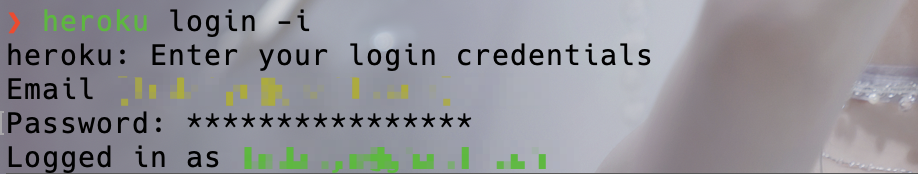

通过heroku login -i邮箱登录。

### 创建需求和procfile文件

在我们将代码推送到远程服务器之前，我们需要满足以下要求

- requirements.txt
- Procfile

```bash

pip freeze

touch requirements.txt
pipp freeze > requirements.txt
cat requirements.txt

touch Procfile
ls
```

Procfile将包含在网络服务器上运行应用程序的命令，在我们的例子中是在Heroku上。

```bash
web: python app.py
```


### 将项目推送到heroku

现在，它已经准备好被部署了。在heroku上部署应用程序的步骤

1、git init
2、git add .
3、git commit -m "commit message"
4、heroku create 'name of the app as one word'
5、git push heroku master
6、heroku open(to launch the deployed application)

在这一步之后你会得到一个这样的应用程序。http://thirdaysofpython-practice.herokuapp.com/。



In [4]:
pip install jupyterlab-language-pack-zh-CN

     |████████████████████████████████| 98 kB 869 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
